In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error


Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building1 = pd.read_csv("building 1.csv")

In [3]:
building1

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,3,32.7,2019-01-10 00:00:00,2019,1,10,0,0,Building1
1,7,34.5,2019-01-10 01:00:00,2019,1,10,1,0,Building1
2,11,32.5,2019-01-10 02:00:00,2019,1,10,2,0,Building1
3,15,33.0,2019-01-10 03:00:00,2019,1,10,3,0,Building1
4,19,38.6,2019-01-10 04:00:00,2019,1,10,4,0,Building1
...,...,...,...,...,...,...,...,...,...
15836,63439,10.6,2020-10-31 19:00:00,2020,10,31,19,0,Building1
15837,63443,9.9,2020-10-31 20:00:00,2020,10,31,20,0,Building1
15838,63447,10.8,2020-10-31 21:00:00,2020,10,31,21,0,Building1
15839,63451,9.8,2020-10-31 22:00:00,2020,10,31,22,0,Building1


In [4]:
building1['datetime']=pd.to_datetime(building1['datetime'], format='%Y-%m-%d %H:%M:%S')

building1= building1.set_index('datetime')

building1= building1.asfreq('H')

<AxesSubplot:xlabel='datetime'>

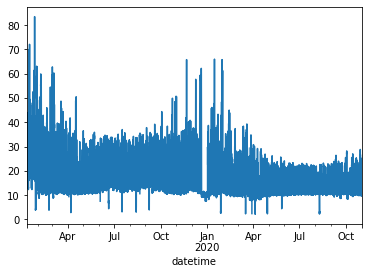

In [5]:
building1["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building1train = building1.loc[:end_train,:]

building1test=building1.loc[start_test:, :]

In [7]:
building1train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-01-10 00:00:00,3.0,32.7,2019.0,1.0,10.0,0.0,0.0,Building1
2019-01-10 01:00:00,7.0,34.5,2019.0,1.0,10.0,1.0,0.0,Building1
2019-01-10 02:00:00,11.0,32.5,2019.0,1.0,10.0,2.0,0.0,Building1
2019-01-10 03:00:00,15.0,33.0,2019.0,1.0,10.0,3.0,0.0,Building1
2019-01-10 04:00:00,19.0,38.6,2019.0,1.0,10.0,4.0,0.0,Building1
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,34159.0,9.7,2019.0,12.0,31.0,19.0,0.0,Building1
2019-12-31 20:00:00,34163.0,11.3,2019.0,12.0,31.0,20.0,0.0,Building1
2019-12-31 21:00:00,34167.0,9.6,2019.0,12.0,31.0,21.0,0.0,Building1


In [8]:
building1test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,34179.0,9.5,2020.0,1.0,1.0,0.0,0.0,Building1
2020-01-01 01:00:00,34183.0,9.9,2020.0,1.0,1.0,1.0,0.0,Building1
2020-01-01 02:00:00,34187.0,10.3,2020.0,1.0,1.0,2.0,0.0,Building1
2020-01-01 03:00:00,34191.0,9.5,2020.0,1.0,1.0,3.0,0.0,Building1
2020-01-01 04:00:00,34195.0,9.3,2020.0,1.0,1.0,4.0,0.0,Building1
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,63439.0,10.6,2020.0,10.0,31.0,19.0,0.0,Building1
2020-10-31 20:00:00,63443.0,9.9,2020.0,10.0,31.0,20.0,0.0,Building1
2020-10-31 21:00:00,63447.0,10.8,2020.0,10.0,31.0,21.0,0.0,Building1


In [9]:
train_b1 = building1train.reset_index()[["datetime","series_value"]]
train_b1.columns=["ds","y"]
train_b1

,ds,y
0,2019-01-10 00:00:00,32.7
1,2019-01-10 01:00:00,34.5
2,2019-01-10 02:00:00,32.5
3,2019-01-10 03:00:00,33.0
4,2019-01-10 04:00:00,38.6
...,...,...
8539,2019-12-31 19:00:00,9.7
8540,2019-12-31 20:00:00,11.3
8541,2019-12-31 21:00:00,9.6
8542,2019-12-31 22:00:00,10.0


In [10]:
model_b1 = Prophet()
model_b1.fit(train_b1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_b1 = model_b1.make_future_dataframe(periods=7320,freq="H")

In [12]:
future_b1

,ds
0,2019-01-10 00:00:00
1,2019-01-10 01:00:00
2,2019-01-10 02:00:00
3,2019-01-10 03:00:00
4,2019-01-10 04:00:00
...,...
15859,2020-10-31 19:00:00
15860,2020-10-31 20:00:00
15861,2020-10-31 21:00:00
15862,2020-10-31 22:00:00


In [13]:
forecast_b1 = model_b1.predict(future_b1)

In [14]:
forecast_b1
#forecast_b1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-10 00:00:00,27.743344,30.246296,45.450127,27.743344,27.743344,9.974884,9.974884,9.974884,5.668416,5.668416,5.668416,4.306468,4.306468,4.306468,0.0,0.0,0.0,37.718228
1,2019-01-10 01:00:00,27.737358,30.544677,46.795276,27.737358,27.737358,11.019865,11.019865,11.019865,6.635550,6.635550,6.635550,4.384315,4.384315,4.384315,0.0,0.0,0.0,38.757222
2,2019-01-10 02:00:00,27.731372,31.169176,47.098206,27.731372,27.731372,11.612688,11.612688,11.612688,7.152272,7.152272,7.152272,4.460416,4.460416,4.460416,0.0,0.0,0.0,39.344060
3,2019-01-10 03:00:00,27.725385,31.716653,47.611875,27.725385,27.725385,12.179037,12.179037,12.179037,7.644740,7.644740,7.644740,4.534297,4.534297,4.534297,0.0,0.0,0.0,39.904423
4,2019-01-10 04:00:00,27.719399,32.761572,47.687490,27.719399,27.719399,12.779935,12.779935,12.779935,8.174531,8.174531,8.174531,4.605404,4.605404,4.605404,0.0,0.0,0.0,40.499334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,2020-10-31 19:00:00,0.185193,-33.679403,7.289425,-17.912535,19.464715,-13.500499,-13.500499,-13.500499,-3.600664,-3.600664,-3.600664,-9.899835,-9.899835,-9.899835,0.0,0.0,0.0,-13.315306
15860,2020-10-31 20:00:00,0.182915,-32.106499,8.585281,-17.917122,19.466615,-11.848621,-11.848621,-11.848621,-2.125894,-2.125894,-2.125894,-9.722727,-9.722727,-9.722727,0.0,0.0,0.0,-11.665706
15861,2020-10-31 21:00:00,0.180637,-29.851502,9.992976,-17.921710,19.468514,-9.814613,-9.814613,-9.814613,-0.306449,-0.306449,-0.306449,-9.508165,-9.508165,-9.508165,0.0,0.0,0.0,-9.633976
15862,2020-10-31 22:00:00,0.178359,-27.490240,12.817465,-17.927352,19.470414,-7.409272,-7.409272,-7.409272,1.848398,1.848398,1.848398,-9.257670,-9.257670,-9.257670,0.0,0.0,0.0,-7.230913


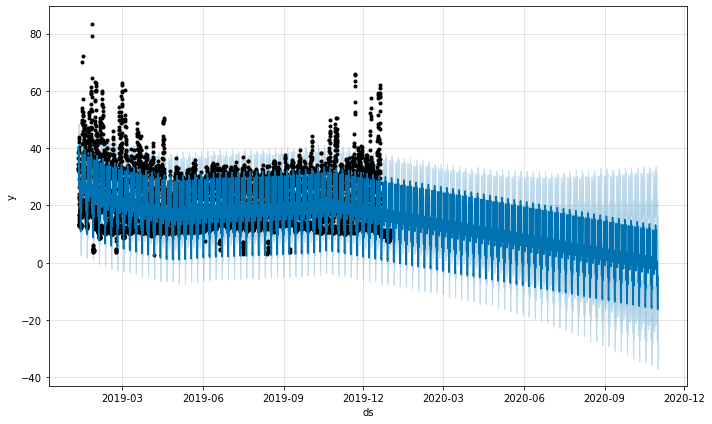

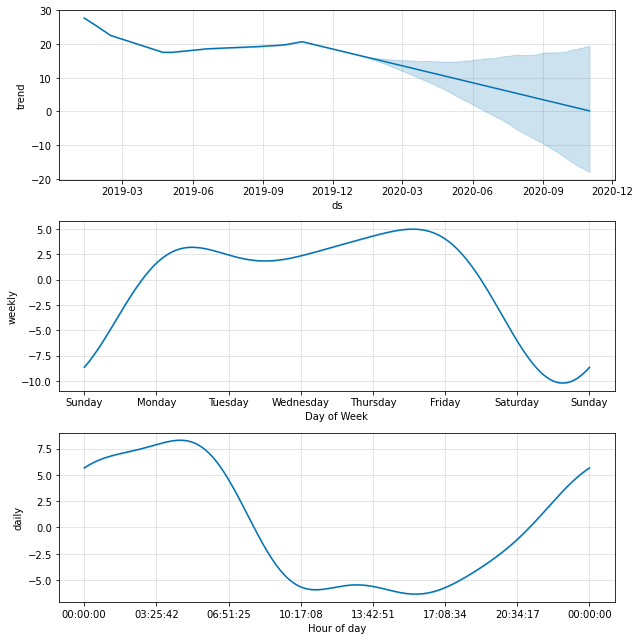

In [15]:
# plot the prediction 
fig= model_b1.plot(forecast_b1)
#plot predictions 
fig= model_b1.plot_components(forecast_b1)

In [16]:
forecast_b1["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b1["additive_terms"])
additive_terms

,additive_terms
0,9.974884
1,11.019865
2,11.612688
3,12.179037
4,12.779935
...,...
15859,-13.500499
15860,-11.848621
15861,-9.814613
15862,-7.409272


In [17]:
building1["series_value"]
actual_value = pd.DataFrame(building1.reset_index()["series_value"])
actual_value

,series_value
0,32.7
1,34.5
2,32.5
3,33.0
4,38.6
...,...
15859,10.6
15860,9.9
15861,10.8
15862,9.8


In [18]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building1.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b1["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-01-10 00:00:00,22.725116,9.974884,32.7
1,2019-01-10 01:00:00,23.480135,11.019865,34.5
2,2019-01-10 02:00:00,20.887312,11.612688,32.5
3,2019-01-10 03:00:00,20.820963,12.179037,33.0
4,2019-01-10 04:00:00,25.820065,12.779935,38.6
...,...,...,...,...
15859,2020-10-31 19:00:00,24.100499,-13.500499,10.6
15860,2020-10-31 20:00:00,21.748621,-11.848621,9.9
15861,2020-10-31 21:00:00,20.614613,-9.814613,10.8
15862,2020-10-31 22:00:00,17.209272,-7.409272,9.8


In [19]:
output.to_csv("b1_actual_additive.csv",index=False)